Nama: Syarani Afa Natira Kusumah<br>
NIM: 2502037864<br>

In [ ]:
!pip install nltk
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import re
import string
string.punctuation
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 1. Mengumpulkan data teks berita dengan menggunakan metode web scrapping

In [ ]:
def get_links(url, link_class):
    response = req.get(url)

    if response.status_code == 200:
        soup = bs(response.content, 'html.parser')

        links = soup.find_all('a',  class_=link_class)

        for link in links:
            href = link.get('href')
            print(href)
        print("Total links retrieved:", len(links))
    else:
        print("Failed to fetch the page. Status code:", response.status_code)

In [ ]:
cnnIndo = get_links('https://www.cnnindonesia.com/','flex group items-center gap-4')

https://www.cnnindonesia.com/olahraga/20240425011113-142-1090182/korea-selatan-u-23-latihan-tertutup-jelang-lawan-indonesia
https://www.cnnindonesia.com/olahraga/20240424193147-142-1090133/korea-punya-bomber-ganas-sty-siapkan-permainan-berkualitas
https://www.cnnindonesia.com/olahraga/20240424103337-142-1089826/wasit-kontroversial-pimpin-indonesia-vs-korea-selatan-u-23
https://www.cnnindonesia.com/nasional/20240424120646-617-1089857/prabowo-ke-anies-saya-tahu-senyuman-anda-berat-sekali
https://www.cnnindonesia.com/nasional/20240424072757-617-1089731/prabowo-gibran-resmi-ditetapkan-presiden-wakil-presiden-2024-2029
https://www.cnnindonesia.com/nasional/20240424064532-617-1089726/bw-pertanyakan-konsistensi-ketua-mk-suhartoyo-di-sengketa-pilpres
https://www.cnnindonesia.com/olahraga/20240425011113-142-1090182/korea-selatan-u-23-latihan-tertutup-jelang-lawan-indonesia
https://www.cnnindonesia.com/nasional/20240425001900-20-1090179/satu-anggota-tersambar-petir-di-depan-pintu-mabes-tni-menin

In [ ]:
liputan6 = get_links('https://www.liputan6.com/','articles--iridescent-list--text-item__title-link')

https://www.liputan6.com/news/read/5579956/infografis-poin-poin-penting-putusan-mk-tolak-gugatan-pilpres-2024
https://www.liputan6.com/news/read/5580886/kompolnas-minta-atasan-5-oknum-polisi-terlibat-kasus-narkoba-di-depok-diperiksa
https://www.liputan6.com/regional/read/5580146/tragedi-ledakan-maut-petasan-jelang-pernikahan-di-bangkalan-1-tewas-2-kritis
https://www.liputan6.com/islami/read/5580981/5-golongan-ini-tak-ditanya-malaikat-munkar-nakir-dan-bebas-siksa-kubur-bagaimana-kita
https://www.liputan6.com/bola/read/5580787/dapatkan-link-live-streaming-liga-inggris-everton-vs-liverpool-segera-tayang-di-vidio
https://www.liputan6.com/bola/read/5580789/link-live-streaming-liga-inggris-manchester-united-vs-sheffield-united-sebentar-lagi-mulai-di-vidio
https://www.liputan6.com/regional/read/5579803/dituduh-jadi-informan-polisi-pria-di-palembang-dikeroyok-warga
https://www.liputan6.com/news/read/5580888/gibran-bakal-evaluasi-data-kis-kip-untuk-program-makan-siang-dan-minum-susu-gratis
http

In [ ]:
tvone = get_links('https://www.tvonenews.com/','ali-title')

https://www.tvonenews.com/berita/nasional/204895-mabes-tni-beri-kabar-duka-satu-dari-dua-prajurit-meninggal-dunia-usai-tersambar-petir-begini-kronologinya
https://www.tvonenews.com/berita/nasional/204891-soal-korupsi-timah-rp271-triliun-yang-menyeret-harvey-moeis-kejaksaan-agung-periksa-saksi-dari-kementerian-esdm
https://www.tvonenews.com/berita/nasional/204880-jaksa-kpk-bakal-panggil-istri-dan-anak-anak-syl-di-persidangan-soal-kasus-pemerasan-dan-gratifikasi
https://www.tvonenews.com/bola/timnas/204903-korea-selatan-tak-terkalahkan-di-grup-b-tapi-ketar-ketir-lawan-timnas-indonesia-u23-pelatih-korsel-jujur-akui
https://www.tvonenews.com/berita/opini/204016-boston-enam-bintang-bagian-2-habis
https://www.tvonenews.com/berita/nasional/204886-polisi-geledah-rumah-pria-di-banjarmasin-ini-hasilnya-mencengangkan-bagi-yang-kenal-dia-siap-siap-ya
https://www.tvonenews.com/berita/nasional/204884-alasan-pria-yang-bacok-ibu-kandungnya-di-cengkareng-jakarta-barat-wajib-diperiksa-kejiwaannya-menger

In [ ]:
detik = get_links('https://news.detik.com/','media__link')

https://news.detik.com/berita/d-7308204/istri-syl-dapat-duit-harian-dan-bulanan-dari-kementan-nilainya-rp-30-juta
https://news.detik.com/berita/d-7308204/istri-syl-dapat-duit-harian-dan-bulanan-dari-kementan-nilainya-rp-30-juta
https://news.detik.com/pemilu/d-7308111/prabowo-bicara-senyum-berat-karena-pernah-di-posisi-sama-anies-biasa-aja
https://news.detik.com/pemilu/d-7308111/prabowo-bicara-senyum-berat-karena-pernah-di-posisi-sama-anies-biasa-aja
https://news.detik.com/pemilu/d-7308025/momen-prabowo-guncang-guncang-badan-anies-sambil-tertawa-saat-salaman
https://news.detik.com/pemilu/d-7308025/momen-prabowo-guncang-guncang-badan-anies-sambil-tertawa-saat-salaman
https://news.detik.com/pemilu/d-7307756/resmi-prabowo-gibran-presiden-dan-wakil-presiden-terpilih-2024-2029
https://news.detik.com/pemilu/d-7307756/resmi-prabowo-gibran-presiden-dan-wakil-presiden-terpilih-2024-2029
https://news.detik.com/berita/d-7307819/saksi-ungkap-dokumen-pemeriksaan-di-kpk-bocor-ke-syl
https://news.deti

In [ ]:
# Fungsi untuk melakukan scraping dan mengambil link artikel
def fetch_article_links(url, link_selector):
  response = req.get(url)
  if response.status_code == 200:
    soup = bs(response.content, 'html.parser')
    links = soup.find_all('a', class_=link_selector)
    article_links = [link.get('href') for link in links]
    return article_links
  else:
    print("Failed to fetch the page. Status code:", response.status_code)
    return []

#Fungsi untuk mengambil paragraf berita
def get_paragraph(url):
  response = req.get(url)
  if response.status_code == 200:
      soup = bs(response.content, 'html.parser')
      paragraphs = soup.find_all('p')
      article_content = ' '.join(paragraph.text for paragraph in paragraphs)
      return article_content.strip()
  else:
      return ""

def classify_article(text):
  categories = {
      'Politik': ['pemilu', 'pemerintah', 'partai politik', 'kebijakan', 'korupsi', 'pilpres', 'partai', 'debat','pemilihan umum', 'presiden', 'politik'],
      'Olahraga': ['pertandingan', 'tim', 'atlet', 'skor', 'liga', 'turnamen', 'mendali', 'pelatih', 'rekor', 'olahraga'],
      'Bisnis': ['perusahaan', 'saham', 'ekonomi', 'investasi', 'pengusaha', 'strategi', 'laba', 'kerugian', 'bisnis'],
      'Hiburan': ['aktor', 'aktris', 'film', 'musik', 'penghargaan', 'festival', 'album','pertunjukan', 'hiburan'],
  }
  for category, keywords in categories.items():
    if any(keyword in text.lower() for keyword in keywords):
      return category
  return "Lainnya"

In [ ]:
websites = [
    {'url': 'https://www.cnnindonesia.com/', 'name': 'CNN Indonesia', 'link_selector': 'flex group items-center gap-4'},
    {'url': 'https://www.liputan6.com/', 'name': 'Liputan 6', 'link_selector': 'articles--iridescent-list--text-item__title-link'},
    {'url': 'https://www.tvonenews.com/', 'name': 'TVOne', 'link_selector': 'ali-title'},
    {'url': 'https://news.detik.com/', 'name': 'Detikcom', 'link_selector': 'media__link'},
]

articles = []
for website in websites:
  article_links = fetch_article_links(website['url'], website['link_selector'])
  for link in article_links:
    paragraph = get_paragraph(link)
    if paragraph:
      category = classify_article(link)
      articles.append({'Teks': paragraph, 'Media': website['name'], 'Label': category})

data = pd.DataFrame(articles)

In [ ]:
df = data.copy()

## 2. Melakukan text preprocessing

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

df['Teks'] = df['Teks'].apply(remove_punctuation)

#lowering the Text
df['Clean_teks'] = df['Teks'].apply(lambda x: x.lower())
df.head()

,Teks,Media,Label,Clean_teks
0,Korea Selatan U23 melakukan latihan tertutup j...,CNN Indonesia,Olahraga,korea selatan u23 melakukan latihan tertutup j...
1,Pelatih Timnas Indonesia U23 Shin Tae Yong mew...,CNN Indonesia,Olahraga,pelatih timnas indonesia u23 shin tae yong mew...
2,Wasit kontroversial Shaun Evans dipastikan aka...,CNN Indonesia,Olahraga,wasit kontroversial shaun evans dipastikan aka...
3,Presiden terpilih Prabowo Subianto menyapa riv...,CNN Indonesia,Lainnya,presiden terpilih prabowo subianto menyapa riv...
4,Komisi Pemilihan Umum KPU resmi menetapkan Pra...,CNN Indonesia,Politik,komisi pemilihan umum kpu resmi menetapkan pra...


In [ ]:
#defining function for tokenization
def tokenize_text(text):
  tokens = nltk.tokenize.word_tokenize(text)
  return tokens

df["Tokenied_teks"] = df['Clean_teks'].apply(tokenize_text)
df

,Teks,Media,Label,Clean_teks,Tokenied_teks
0,Korea Selatan U23 melakukan latihan tertutup j...,CNN Indonesia,Olahraga,korea selatan u23 melakukan latihan tertutup j...,"[korea, selatan, u23, melakukan, latihan, tert..."
1,Pelatih Timnas Indonesia U23 Shin Tae Yong mew...,CNN Indonesia,Olahraga,pelatih timnas indonesia u23 shin tae yong mew...,"[pelatih, timnas, indonesia, u23, shin, tae, y..."
2,Wasit kontroversial Shaun Evans dipastikan aka...,CNN Indonesia,Olahraga,wasit kontroversial shaun evans dipastikan aka...,"[wasit, kontroversial, shaun, evans, dipastika..."
3,Presiden terpilih Prabowo Subianto menyapa riv...,CNN Indonesia,Lainnya,presiden terpilih prabowo subianto menyapa riv...,"[presiden, terpilih, prabowo, subianto, menyap..."
4,Komisi Pemilihan Umum KPU resmi menetapkan Pra...,CNN Indonesia,Politik,komisi pemilihan umum kpu resmi menetapkan pra...,"[komisi, pemilihan, umum, kpu, resmi, menetapk..."
...,...,...,...,...,...
240,Presiden Amerika Serikat AS Joe Biden menandat...,Detikcom,Lainnya,presiden amerika serikat as joe biden menandat...,"[presiden, amerika, serikat, as, joe, biden, m..."
241,Kapuspen TNI Mayjen TNI Nugraha Gumilar meluru...,Detikcom,Olahraga,kapuspen tni mayjen tni nugraha gumilar meluru...,"[kapuspen, tni, mayjen, tni, nugraha, gumilar,..."
242,PDIP beserta paslonnya Ganjar PranowoMahfud Md...,Detikcom,Politik,pdip beserta paslonnya ganjar pranowomahfud md...,"[pdip, beserta, paslonnya, ganjar, pranowomahf..."
243,Mahkamah Konstitusi MK menolak permohonan seng...,Detikcom,Politik,mahkamah konstitusi mk menolak permohonan seng...,"[mahkamah, konstitusi, mk, menolak, permohonan..."


In [ ]:
#defining the function to remove stopwords from tokenized text
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

def stopword_text(tokens):
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords:
      cleaned_tokens.append(token)
  return cleaned_tokens

df["No_stopword"] = df['Tokenied_teks'].apply(stopword_text)
df

,Teks,Media,Label,Clean_teks,Tokenied_teks,No_stopword
0,Korea Selatan U23 melakukan latihan tertutup j...,CNN Indonesia,Olahraga,korea selatan u23 melakukan latihan tertutup j...,"[korea, selatan, u23, melakukan, latihan, tert...","[korea, selatan, u23, melakukan, latihan, tert..."
1,Pelatih Timnas Indonesia U23 Shin Tae Yong mew...,CNN Indonesia,Olahraga,pelatih timnas indonesia u23 shin tae yong mew...,"[pelatih, timnas, indonesia, u23, shin, tae, y...","[pelatih, timnas, indonesia, u23, shin, tae, y..."
2,Wasit kontroversial Shaun Evans dipastikan aka...,CNN Indonesia,Olahraga,wasit kontroversial shaun evans dipastikan aka...,"[wasit, kontroversial, shaun, evans, dipastika...","[wasit, kontroversial, shaun, evans, dipastika..."
3,Presiden terpilih Prabowo Subianto menyapa riv...,CNN Indonesia,Lainnya,presiden terpilih prabowo subianto menyapa riv...,"[presiden, terpilih, prabowo, subianto, menyap...","[presiden, terpilih, prabowo, subianto, menyap..."
4,Komisi Pemilihan Umum KPU resmi menetapkan Pra...,CNN Indonesia,Politik,komisi pemilihan umum kpu resmi menetapkan pra...,"[komisi, pemilihan, umum, kpu, resmi, menetapk...","[komisi, pemilihan, umum, kpu, resmi, menetapk..."
...,...,...,...,...,...,...
240,Presiden Amerika Serikat AS Joe Biden menandat...,Detikcom,Lainnya,presiden amerika serikat as joe biden menandat...,"[presiden, amerika, serikat, as, joe, biden, m...","[presiden, amerika, serikat, as, joe, biden, m..."
241,Kapuspen TNI Mayjen TNI Nugraha Gumilar meluru...,Detikcom,Olahraga,kapuspen tni mayjen tni nugraha gumilar meluru...,"[kapuspen, tni, mayjen, tni, nugraha, gumilar,...","[kapuspen, tni, mayjen, tni, nugraha, gumilar,..."
242,PDIP beserta paslonnya Ganjar PranowoMahfud Md...,Detikcom,Politik,pdip beserta paslonnya ganjar pranowomahfud md...,"[pdip, beserta, paslonnya, ganjar, pranowomahf...","[pdip, beserta, paslonnya, ganjar, pranowomahf..."
243,Mahkamah Konstitusi MK menolak permohonan seng...,Detikcom,Politik,mahkamah konstitusi mk menolak permohonan seng...,"[mahkamah, konstitusi, mk, menolak, permohonan...","[mahkamah, konstitusi, mk, menolak, permohonan..."


In [ ]:
#defining a function for stemming
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

def stemming_text(tokens):
  result = [stemmer.stem(token) for token in tokens]
  return result

df["Stemmed_teks"] = df['No_stopword'].apply(stemming_text)
df

,Teks,Media,Label,Clean_teks,Tokenied_teks,No_stopword,Stemmed_teks
0,Korea Selatan U23 melakukan latihan tertutup j...,CNN Indonesia,Olahraga,korea selatan u23 melakukan latihan tertutup j...,"[korea, selatan, u23, melakukan, latihan, tert...","[korea, selatan, u23, melakukan, latihan, tert...","[korea, selatan, u23, laku, latih, tutup, jela..."
1,Pelatih Timnas Indonesia U23 Shin Tae Yong mew...,CNN Indonesia,Olahraga,pelatih timnas indonesia u23 shin tae yong mew...,"[pelatih, timnas, indonesia, u23, shin, tae, y...","[pelatih, timnas, indonesia, u23, shin, tae, y...","[latih, timnas, indonesia, u23, shin, tae, yon..."
2,Wasit kontroversial Shaun Evans dipastikan aka...,CNN Indonesia,Olahraga,wasit kontroversial shaun evans dipastikan aka...,"[wasit, kontroversial, shaun, evans, dipastika...","[wasit, kontroversial, shaun, evans, dipastika...","[wasit, kontroversial, shaun, evans, pasti, pi..."
3,Presiden terpilih Prabowo Subianto menyapa riv...,CNN Indonesia,Lainnya,presiden terpilih prabowo subianto menyapa riv...,"[presiden, terpilih, prabowo, subianto, menyap...","[presiden, terpilih, prabowo, subianto, menyap...","[presiden, pilih, prabowo, subianto, sapa, riv..."
4,Komisi Pemilihan Umum KPU resmi menetapkan Pra...,CNN Indonesia,Politik,komisi pemilihan umum kpu resmi menetapkan pra...,"[komisi, pemilihan, umum, kpu, resmi, menetapk...","[komisi, pemilihan, umum, kpu, resmi, menetapk...","[komisi, pilih, umum, kpu, resmi, tetap, prabo..."
...,...,...,...,...,...,...,...
240,Presiden Amerika Serikat AS Joe Biden menandat...,Detikcom,Lainnya,presiden amerika serikat as joe biden menandat...,"[presiden, amerika, serikat, as, joe, biden, m...","[presiden, amerika, serikat, as, joe, biden, m...","[presiden, amerika, serikat, as, joe, biden, m..."
241,Kapuspen TNI Mayjen TNI Nugraha Gumilar meluru...,Detikcom,Olahraga,kapuspen tni mayjen tni nugraha gumilar meluru...,"[kapuspen, tni, mayjen, tni, nugraha, gumilar,...","[kapuspen, tni, mayjen, tni, nugraha, gumilar,...","[kapuspen, tni, mayjen, tni, nugraha, gumilar,..."
242,PDIP beserta paslonnya Ganjar PranowoMahfud Md...,Detikcom,Politik,pdip beserta paslonnya ganjar pranowomahfud md...,"[pdip, beserta, paslonnya, ganjar, pranowomahf...","[pdip, beserta, paslonnya, ganjar, pranowomahf...","[pdip, serta, paslonnya, ganjar, pranowomahfud..."
243,Mahkamah Konstitusi MK menolak permohonan seng...,Detikcom,Politik,mahkamah konstitusi mk menolak permohonan seng...,"[mahkamah, konstitusi, mk, menolak, permohonan...","[mahkamah, konstitusi, mk, menolak, permohonan...","[mahkamah, konstitusi, mk, tolak, mohon, sengk..."


In [ ]:
df.to_csv("Clean_text.csv", index=False)

## 3. Melakukan text representation dengan menggunakan 2 metode

In [ ]:
#TF-IDF
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(text) for text in df['Stemmed_teks']])

features = tfidf_vectorizer.get_feature_names_out()

def get_tfidf_for_document(document_index):
    return tfidf_matrix[document_index]

tfidf_for_first_doc = get_tfidf_for_document(0)

for feature, weight in zip(features, tfidf_for_first_doc.toarray()[0]):
    print(f"{feature}: {weight:.4f}")

Streaming output truncated to the last 5000 lines.
bin: 0.0441
bina: 0.0000
binasentosa: 0.0000
binatang: 0.0000
bincang: 0.0000
bingkai: 0.0000
bingung: 0.0000
bintang: 0.0000
bipartisan: 0.0000
biribiri: 0.0000
birks: 0.0000
biro: 0.0000
birokrasi: 0.0000
birth: 0.0000
biru: 0.0000
bisa: 0.0000
bismillah: 0.0000
bisnis: 0.0000
bitung: 0.0000
bkad: 0.0000
blackrock: 0.0000
blades: 0.0000
blair: 0.0000
blockchain: 0.0000
blokir: 0.0000
bloomberg: 0.0000
blora: 0.0000
blues: 0.0000
blusukan: 0.0000
bmkg: 0.0000
bnpt: 0.0000
boalemo: 0.0000
bobol: 0.0000
bocah: 0.0000
bocor: 0.0000
bodoh: 0.0000
bogle: 0.0000
bogor: 0.0000
bojong: 0.0000
bokator: 0.0000
bola: 0.0000
boleh: 0.0000
bollywood: 0.0000
bom: 0.0000
boneka: 0.0000
bongkar: 0.0000
bonjol: 0.0000
bonus: 0.0000
booth: 0.0000
bopong: 0.0000
bor: 0.0000
boram: 0.0000
border: 0.0000
borneo: 0.0000
boston: 0.0000
both: 0.0000
bottom: 0.0000
bournemouth: 0.0000
bowo: 0.0000
box: 0.0000
boy: 0.0000
bpbd: 0.0000
bpip: 0.0000
brace: 0.000

In [ ]:
#Word2Vec
text = df['Stemmed_teks']
word2vec_model = Word2Vec(sentences=text, vector_size=50, min_count=3)

word_vectors = word2vec_model.wv

print("Representasi Vektor Word2Vec:")
for word in word_vectors.key_to_index:
    print(word, word_vectors[word])

Streaming output truncated to the last 5000 lines.
 -0.11685406 -0.10018185  0.03816013  0.07693063  0.11486268 -0.0347233
  0.03593459  0.02172444 -0.08209366 -0.05993836 -0.09513944  0.0981535
  0.05466563 -0.03952493 -0.00646914  0.0467128  -0.06517654  0.04880323
 -0.0663559   0.02704788 -0.01237082 -0.05323745  0.08316969  0.00040407
 -0.01476967  0.019622    0.13716242  0.07311611 -0.00479718 -0.07539975
  0.09466091  0.05232533]
polsek [ 0.01730449  0.00889441 -0.00304734  0.00805101 -0.03712089 -0.04991438
  0.09651053  0.05566677 -0.08852724 -0.07310945 -0.01396191 -0.05035007
  0.00307442 -0.02031475 -0.01375319  0.01350005  0.06818882 -0.03056778
 -0.09107668 -0.06420964  0.01320489  0.07066851  0.08005629 -0.02143509
  0.01583743  0.01652689 -0.06222816 -0.07277807 -0.04551147  0.05162886
  0.02846898 -0.03380581 -0.00194925  0.04316312 -0.04094776  0.04529665
 -0.04690633  0.02615889 -0.01193445 -0.0503257   0.05767522  0.00223601
 -0.02690256  0.0296664   0.11580943  0.04

TF-IDF<br>
Pertama, kita perlu mengimpor TfidfVectorizer dari scikit-learn.
Kita harus memastikan data teks telah diproses dengan benar sebelumnya, seperti membersihkan, tokenisasi, dan stemming. Setelah itu, kita menggabungkan teks menjadi satu string untuk setiap dokumen. Menggunakan TfidfVectorizer untuk menghitung skor TF-IDF untuk setiap kata dalam dokumen. Ini akan menghasilkan matriks di mana setiap baris mewakili dokumen dan setiap kolom mewakili kata dalam kosakata.
Kita mendapatkan daftar fitur (kata) yang dihasilkan oleh TfidfVectorizer menggunakan metode get_feature_names_out().Mendefinisikan fungsi get_tfidf_for_document untuk mendapatkan skor TF-IDF untuk dokumen tertentu dari matriks yang dihasilkan sebelumnya. Lalu mencetak skor TF-IDF untuk dokumen pertama untuk melihat seberapa penting setiap kata dalam dokumen tersebut.<br>

Word2Vec<br>
Pertama mengimpor Word2Vec dari gensim.models.Seperti pada langkah sebelumnya, pastikan data teks telah diproses dengan benar. Kita membuat model Word2Vec dengan parameter vector_size=50 untuk membuat vektor berukuran 50 dan min_count=3 untuk mengabaikan kata-kata yang muncul kurang dari 3 kali. Setelah model terlatih, kita mendapatkan representasi vektor kata-kata menggunakan wv (Word Vectors) dari model Word2Vec.Lalu mencetak representasi vektor untuk setiap kata dalam kosakata, yang menunjukkan bagaimana kata tersebut direpresentasikan dalam ruang vektor.

## 4. Melakukan pemodelan klasifikasi berita dengan menggunakan 2 metode Machine Lerning

SVM TF-IDF

In [ ]:
text = df['Stemmed_teks'].apply(lambda x: ' '.join(x))
labels = df['Label']

X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.2, random_state=42)

# Define and fit the pipeline directly
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC())
])
svm_pipeline.fit(X_train, y_train)

# Get predictions using the fitted pipeline
svm_predictions = svm_pipeline.predict(X_test)

# Evaluate the model using classification report
svm_report = classification_report(y_test, svm_predictions)
print("SVM Classification Report:")
print(svm_report)

SVM Classification Report:
              precision    recall  f1-score   support

      Bisnis       0.00      0.00      0.00         2
     Lainnya       0.72      1.00      0.84        29
    Olahraga       1.00      0.38      0.55         8
     Politik       1.00      0.60      0.75        10

    accuracy                           0.78        49
   macro avg       0.68      0.49      0.53        49
weighted avg       0.80      0.78      0.74        49



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model using the best parameters

In [ ]:
text = tfidf_matrix.toarray()
labels = df['Label']

X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.2, random_state=42)

svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_parameters = grid_search.best_params_
print("The best parameter to use: ", best_parameters)

# Create the SVM model using the best parameters
best_model = SVC(**best_parameters)
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

# Print the classification Report
print("Classification report")
print(classification_report(y_test, predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


The best parameter to use:  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Classification report
              precision    recall  f1-score   support

      Bisnis       0.00      0.00      0.00         2
     Lainnya       0.78      1.00      0.88        29
    Olahraga       1.00      0.62      0.77         8
     Politik       1.00      0.70      0.82        10

    accuracy                           0.84        49
   macro avg       0.70      0.58      0.62        49
weighted avg       0.83      0.84      0.81        49



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random forest TF-IDF

In [ ]:
text = df['Stemmed_teks'].apply(lambda x: ' '.join(x))
labels = df['Label']

X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.2, random_state=42)

# Defining a pipeline for Random Forest with TF-IDF vectorizer
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

rf_pipeline.fit(X_train, y_train)

# Get predictions using the fitted pipeline
rf_predictions = rf_pipeline.predict(X_test)

# Evaluate the model using classification report
rf_report = classification_report(y_test, rf_predictions)
print("Random Forest Classification Report:")
print(rf_report)

Random Forest Classification Report:
              precision    recall  f1-score   support

      Bisnis       0.00      0.00      0.00         2
     Lainnya       0.78      0.97      0.86        29
    Olahraga       1.00      0.50      0.67         8
     Politik       0.89      0.80      0.84        10

    accuracy                           0.82        49
   macro avg       0.67      0.57      0.59        49
weighted avg       0.80      0.82      0.79        49



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest model using the best parameters

In [ ]:
text = tfidf_matrix.toarray()
labels = df['Label']

X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'log2'],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_parameters = grid_search.best_params_
print("The best parameter to use: ", best_parameters)

# Create the Random Forest model using the best parameters
best_model = RandomForestClassifier(**best_parameters)
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

# Print the classification Report
print("Classification report")
print(classification_report(y_test, predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'`

The best parameter to use:  {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}
Classification report
              precision    recall  f1-score   support

      Bisnis       0.00      0.00      0.00         2
     Lainnya       0.82      0.97      0.89        29
    Olahraga       1.00      0.62      0.77         8
     Politik       0.90      0.90      0.90        10

    accuracy                           0.86        49
   macro avg       0.68      0.62      0.64        49
weighted avg       0.83      0.86      0.84        49



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Word2Vec

In [ ]:
def avg_word_vector(text, word_vectors):
  return np.mean([word_vectors[word] for word in text if word in word_vectors], axis=0)

word_vectors_list = [avg_word_vector(doc, word_vectors) for doc in text]
X = np.array(word_vectors_list)

SVM_model = SVC(kernel='linear', C=200)
SVM_model.fit(X_train, y_train)

SVM_pred = SVM_model.predict(X_test)

print("Classification report")
print(classification_report(y_test, SVM_pred))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Classification report
              precision    recall  f1-score   support

      Bisnis       0.00      0.00      0.00         2
     Lainnya       0.78      1.00      0.88        29
    Olahraga       1.00      0.62      0.77         8
     Politik       1.00      0.70      0.82        10

    accuracy                           0.84        49
   macro avg       0.70      0.58      0.62        49
weighted avg       0.83      0.84      0.81        49



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model using the best parameters

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced', None]
}

# GridSearchCV with Cross-Validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_parameters = grid_search.best_params_
print("The best parameter to use: ", best_parameters)

# Create the SVM model using the best parameters
best_model = SVC(**best_parameters)
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

# Print the classification Report
print("Classification report")
print(classification_report(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


The best parameter to use:  {'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Classification report
              precision    recall  f1-score   support

      Bisnis       0.00      0.00      0.00         2
     Lainnya       0.78      1.00      0.88        29
    Olahraga       1.00      0.62      0.77         8
     Politik       1.00      0.70      0.82        10

    accuracy                           0.84        49
   macro avg       0.70      0.58      0.62        49
weighted avg       0.83      0.84      0.81        49



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random forest Word2Vec

In [ ]:
def avg_word_vector(text, word_vectors):
  return np.mean([word_vectors[word] for word in text if word in word_vectors], axis=0)

word_vectors_list = [avg_word_vector(doc, word_vectors) for doc in text]
X = np.array(word_vectors_list)

rf_model = RandomForestClassifier(n_estimators=5, max_depth=100)
rf_model.fit(X_train, y_train)
rf_pred =rf_model.predict(X_test)


# Print the classification Report
print("Classification report")
print(classification_report(y_test,rf_pred))

Classification report
              precision    recall  f1-score   support

      Bisnis       0.00      0.00      0.00         2
     Lainnya       0.78      0.86      0.82        29
    Olahraga       0.57      0.50      0.53         8
     Politik       0.71      0.50      0.59        10

    accuracy                           0.69        49
   macro avg       0.52      0.47      0.49        49
weighted avg       0.70      0.69      0.69        49



Random Forest model using the best parameters

In [ ]:
param_grid = {
    'n_estimators': [20, 50, 100],
    'max_depth': [5, 10, 20],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters after GridSearchCV
best_parameters = grid_search.best_params_
print("The best parameter to use: ", best_parameters)

# Create the Random Forest model using the best parameters
best_model = RandomForestClassifier(**best_parameters)
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

# Print the classification Report
print("Classification report")
print(classification_report(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


The best parameter to use:  {'max_depth': 20, 'n_estimators': 20}
Classification report
              precision    recall  f1-score   support

      Bisnis       0.00      0.00      0.00         2
     Hiburan       0.00      0.00      0.00         0
     Lainnya       0.80      0.97      0.88        29
    Olahraga       0.75      0.38      0.50         8
     Politik       0.83      0.50      0.62        10

    accuracy                           0.73        49
   macro avg       0.48      0.37      0.40        49
weighted avg       0.77      0.73      0.73        49



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5. Summary perbandingan performance test data dari model

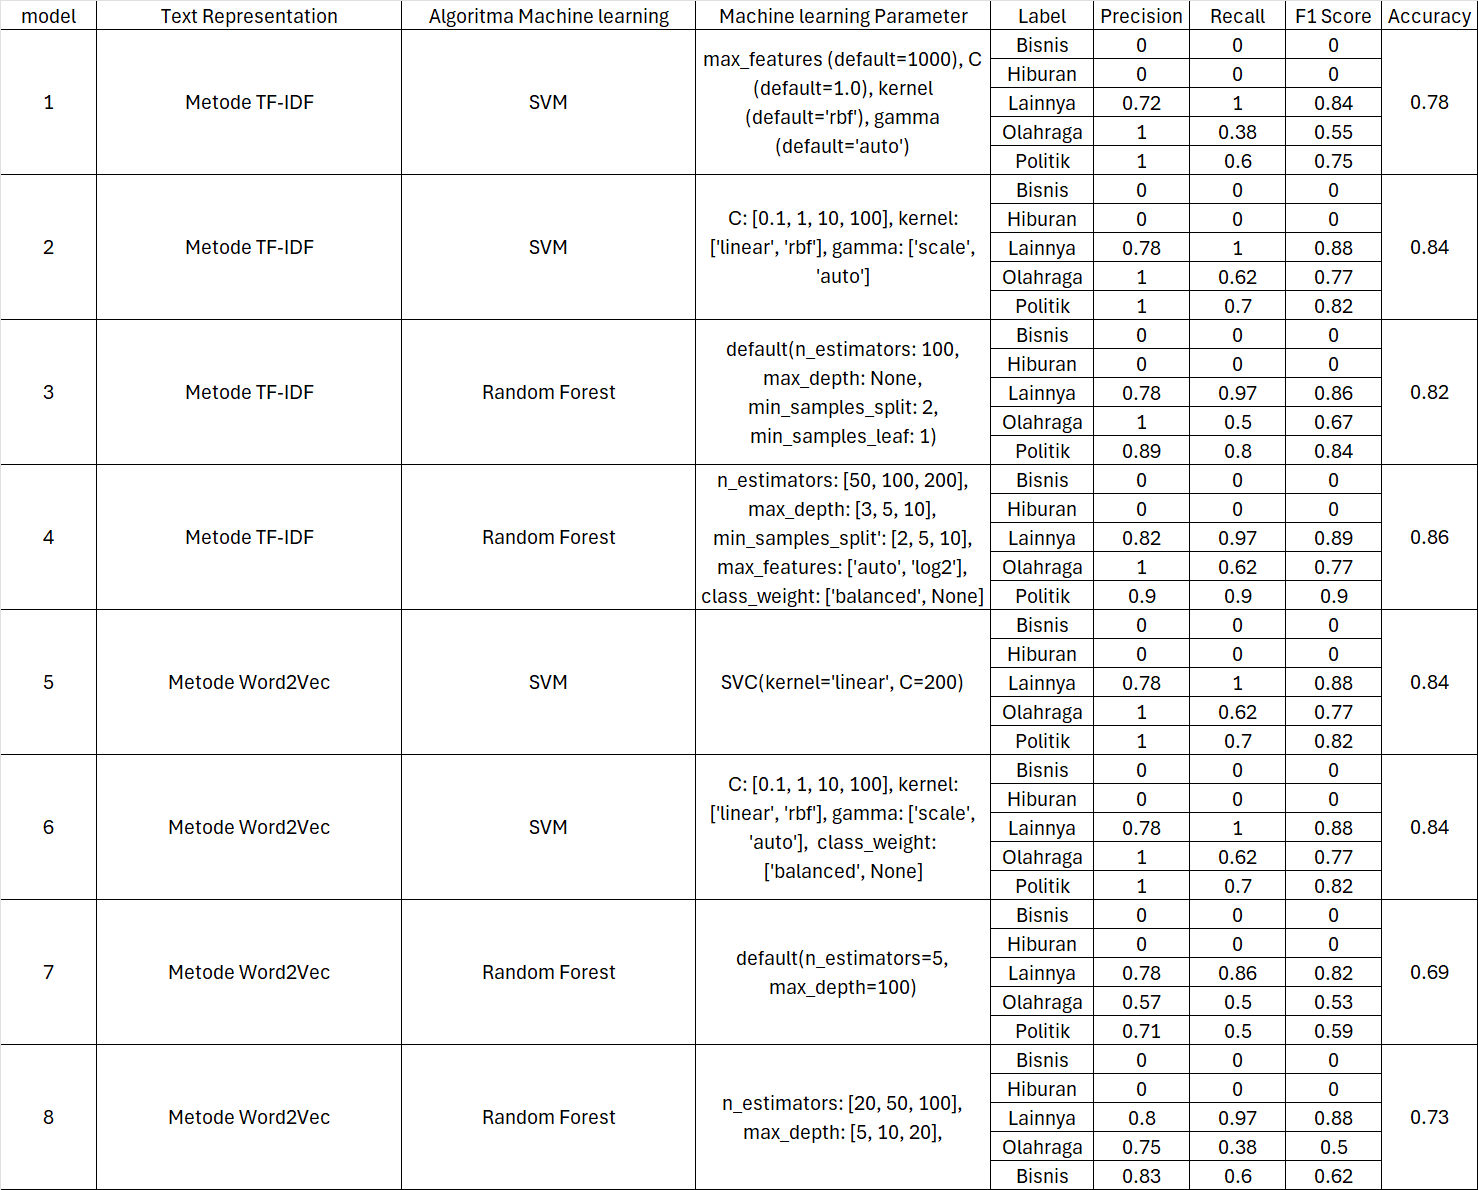

Dapat dilihat bahwa, hasil klasifikasi matriks dari 2 metode representasi kata dan 2 metode machine learning pada tabel memiliki perberbedaan. Jumlah data yang terlalu sedikit dan faktor-faktor lainnya dapat mempengaruhi perhitungan. Seperti yang terlihat pada tabel, bahwa banyak label yang memiliki nilai 0.<br><br>

Mari kita uraikan performa masing-masing model untuk setiap kategori:

- Olahraga:

  Model 1-6: Model-model ini mencapai nilai presisi mulai dari 1,00 hingga 0,57, yang mengindikasikan bahwa prediksi mereka untuk "Olahraga" sebagian besar tepat untuk beberapa model tetapi kurang tepat untuk model lainnya. Nilai recall bervariasi dari 0,62 hingga 0,50, menunjukkan bahwa beberapa model menangkap dokumen "Olahraga" yang lebih relevan daripada yang lain. Nilai F1 berkisar antara 0,77 hingga 0,53, yang mencerminkan keseimbangan antara presisi dan recall.<br><br>

  Model 7-8: Model 7 memiliki presisi yang lebih rendah (0,57) dan recall (0,50) dibandingkan dengan model-model sebelumnya, yang menunjukkan bahwa model ini kesulitan untuk mengidentifikasi dokumen "Olahraga" secara akurat. Model 8 menunjukkan peningkatan presisi (0,75) tetapi masih memiliki recall yang rendah (0,38), yang mengindikasikan bahwa model ini mungkin melewatkan banyak dokumen "Olahraga" yang relevan.<br><br>

- Politik:

  Model 1-6: Model-model ini mencapai nilai presisi mulai dari 1,00 hingga 0,89, menunjukkan bahwa prediksi mereka untuk "Politik" sebagian besar tepat untuk beberapa model tetapi kurang tepat untuk model lainnya. Nilai recall bervariasi dari 0,70 hingga 0,80, menunjukkan bahwa beberapa model menangkap lebih banyak dokumen "Politik" yang relevan daripada yang lain. Nilai F1 berkisar antara 0.82 hingga 0.90, yang mencerminkan keseimbangan antara presisi dan recall.<br><br>

  Model 7-8: Model 7 memiliki presisi yang lebih rendah (0.71) dan recall (0.50) dibandingkan dengan model-model sebelumnya, yang mengindikasikan bahwa model ini kesulitan untuk mengidentifikasi dokumen "Politik" secara akurat. Model 8 menunjukkan peningkatan presisi (0.90) dan recall (0.90), yang menunjukkan bahwa model ini memiliki kinerja yang baik untuk klasifikasi "Politik".<br><br>

- Lainnya:

  Model 1-6: Semua model ini memiliki presisi yang baik (0.72-0.83), yang menunjukkan bahwa prediksi mereka untuk kata "Lainnya" sebagian besar benar. Model-model ini juga memiliki recall yang tinggi (0,97-1,00), yang berarti model-model ini menangkap sebagian besar dokumen "Lainnya" yang sebenarnya. Hal ini menghasilkan nilai F1 yang tinggi (0.82-0.89) dan akurasi keseluruhan (0.78-0.86).<br><br>

  Model 7: Model ini memiliki ketepatan yang sama (0.78) dengan model sebelumnya, tetapi recall-nya lebih rendah (0.86). Ini berarti model ini mungkin melewatkan beberapa dokumen "Lainnya" yang relevan, sehingga menghasilkan F1-score yang lebih rendah (0,82) dan akurasi (0,69).<br><br>

  Model 8: Presisi model ini lebih tinggi (0,83) daripada kebanyakan model lainnya, tetapi recall-nya masih sangat tinggi (0,97). Namun, tabel tersebut hanya menunjukkan kinerja untuk tiga kategori. Ada kemungkinan bahwa recall yang tinggi untuk "Lainnya" mengorbankan performa pada kategori yang tidak ada ("Bisnis").<br><br>

Berdasarkan data yang disediakan, Model 4 (TF-IDF + Random Forest dengan hyperparameter yang disetel) dan Model 8 (Word2Vec + Random Forest dengan hyperparameter yang disetel) memiliki kinerja terbaik secara keseluruhan, dengan skor F1 dan akurasi yang tinggi untuk sebagian besar kategori. Namun, Model 8 memiliki recall dan skor F1 yang jauh lebih rendah untuk kategori Olahraga. Oleh karena itu, Model 4 adalah pilihan yang lebih baik karena memiliki recall yang tinggi untuk semua kategori.